This implementation of a classifer makes use of the scikit-learn library, which can be downloaded from [here](https://scikit-learn.org/stable/install.html).
I also make use of numpy for data manipulation available [here](https://numpy.org/install/), and matplotlib for data visualisation available [here](https://matplotlib.org/stable/users/installing/index.html).

# Random Forest Classifier

A random forest classifier is an ensemble of decision tree classifiers.

## Data Preperation

scikit-learn provides a function for generating fake data for testing classifiers. It also provides a function for splitting data into a training and test set, so that when the classifier has been trained, theres some data left to test it with.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, Y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_classes=3, 
    n_clusters_per_class=1)
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)



Note that the generated data is being given 2 features, so the input space is a 2d plane. That's just to showcase how classifers can be visualised in 2d later on. Also note, the data items are being gven on of three different catgeories

## Model Training

scikit learn provides a class for many different types of classifiers.

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

## Model Predictions

numpy provides the tools needed to transform the test data into a form that represents a 2d space. Essentially the test data is being split into two columns, which are then being transformed into more dense columns, representing the axis of the 2d feature space. 

In [6]:
from numpy import arange

Xi_test, Xii_test = X_test[:, 0], X_test[:, 1]
Xi, Xii = arange(min(Xi_test), max(Xi_test) + 1, 0.02), arange(min(Xii_test), max(Xii_test) + 1, 0.02)


numpy also provides tools for enumerating the two column vectors to obtain a stack of input values for the classifier to try and categorise. This makes it possible to classify the whole 2d space of inputs, to some level of granularity.

More specifically, the meshgrid function transforms those column vectors into matrices that record a value for each point in the 2d space. Then the ravel/column stack function combo is used to create a stack of all coordinate points. 

In [7]:
from numpy import column_stack, meshgrid

Xi_mesh, Xii_mesh = meshgrid(Xi, Xii)
X_mesh_stack = column_stack((Xi_mesh.ravel(), Xii_mesh.ravel()))

The classifier is able to make predictions through one it's methods. The result of the classifer is a stack of categories, with each row category being a prediction corresponsing to each coordinate point. More technically, the result of prediction is a numpy array containing integers that represent either of the three possible categories. 

Conveniently, numpy arrays may be reshaped. For data visualisation purposes the predictions are reshaped into the shape of 2d space.

In [8]:
Y_pred = classifier.predict(X_mesh_stack).reshape((Xii.shape[0], Xi.shape[0]))

## Model Visualisation

In order to visualise how good the classifier was, it's useful to plot the test data, as well as the predictions, so that so that the predicted categories can be compared to the actual categories for the test data inputs. The test data will be split by actual catageory, so that each split can be assigned it's own colour corresponding to it's actual category. 

Conveniently, numpy arrays allow boolean masking.

In [10]:
category_masks = {c: Y_test == c for c in range(3)} # values are the shape of Y_test, with 1s where the category is c and 0s elsewhere
Xi_test_split = {c: Xi_test[mask] for c, mask in category_masks.items()}
Xii_test_split = {c: Xii_test[mask] for c, mask in category_masks.items()}
Y_test_split = {c : Y_test[mask] for c, mask in category_masks.items()}

matplotlib features a bunch of useful functions for creating different visualisations. predictions for 2d space will be visualised as a coloured contour map, with the actual categories of the test data overlayed as a scatterplot. 

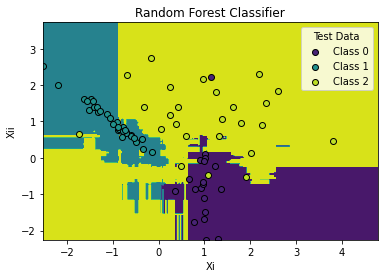

In [54]:
from matplotlib.pyplot import (colormaps, contourf, legend, scatter, show, 
                               title, xlabel, ylabel)

colours = colormaps["viridis"]

contourf(Xi, Xii, Y_pred)
for i in range(3):
    scatter(Xi_test_split[i], Xii_test_split[i], 
            color=colours(0.1 + i * 0.4), 
            edgecolors="black", 
            label=f"Class {i}")
title("Random Forest Classifier")
xlabel("Xi")
ylabel("Xii")
legend(title="Test Data")
show()

The classifier was very accurate with the test data, with only a few outliers not being classified correctly. 